In [1]:
pip install scrapy transformers bertopic spacy plotly wordcloud gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 837.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 33.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!scrapy startproject webscraping_project

New Scrapy project 'webscraping_project', using template directory '/usr/local/lib/python3.10/dist-packages/scrapy/templates/project', created in:
    /content/webscraping_project

You can start your first spider with:
    cd webscraping_project
    scrapy genspider example example.com


In [ ]:
cd webscraping_project

/content/webscraping_project


In [ ]:
cd webscraping_project/spiders

/content/webscraping_project/webscraping_project/spiders


In [ ]:
!scrapy genspider myspider example.com

Created spider 'myspider' using template 'basic' in module:
  webscraping_project.spiders.myspider


In [ ]:
!scrapy crawl myspider -o output.json

2024-08-27 04:55:57 [scrapy.utils.log] INFO: Scrapy 2.11.2 started (bot: webscraping_project)
2024-08-27 04:55:57 [scrapy.utils.log] INFO: Versions: lxml 4.9.4.0, libxml2 2.10.3, cssselect 1.2.0, parsel 1.9.1, w3lib 2.2.1, Twisted 24.7.0, Python 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0], pyOpenSSL 24.2.1 (OpenSSL 3.3.1 4 Jun 2024), cryptography 43.0.0, Platform Linux-6.1.85+-x86_64-with-glibc2.35
2024-08-27 04:55:57 [scrapy.addons] INFO: Enabled addons:
[]
2024-08-27 04:55:57 [asyncio] DEBUG: Using selector: EpollSelector
2024-08-27 04:55:57 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2024-08-27 04:55:57 [scrapy.utils.log] DEBUG: Using asyncio event loop: asyncio.unix_events._UnixSelectorEventLoop
2024-08-27 04:55:57 [scrapy.extensions.telnet] INFO: Telnet Password: d4a06e42c31262bd
2024-08-27 04:55:57 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetCons

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
  doc = nlp(text)
  tokens = [token.lemma_ for token in doc if token.is_stop != True and token.is_punct != True]
  return " ".join(tokens)

In [ ]:
import json

def process_scraped_data(file_path):
  with open(file_path, 'r') as f:
    data = json.load(f)
  return [preprocess_text(item['text']) for item in data]

In [ ]:
from transformers import pipeline

sentiment_model = pipeline('sentiment-analysis', model="cardiffnlp/twitter-roberta-base-sentiment")

LABEL_MAPPING = {
    'LABEL_0': "Negative",
    'LABEL_1': "Neutral",
    'LABEL_2': "Positive"
}

def analyze_sentiment(text):
    result = sentiment_model(text)[0]
    label = result['label']
    sentiment = LABEL_MAPPING.get(label, "Unknown")
    return sentiment

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def get_topics(docs, n_topics=5):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(docs)

    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(X)

    # Get topics and top words
    feature_names = vectorizer.get_feature_names_out()
    topics = []
    for topic_idx, topic in enumerate(lda.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
        topics.append(f"Topic {topic_idx}: {' '.join(top_words)}")

    return topics

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def extract_keywords(corpus):
    vectorizer = TfidfVectorizer(max_features=10)
    X = vectorizer.fit_transform(corpus)
    return vectorizer.get_feature_names_out()

In [ ]:
import gradio as gr

def analyze_and_visualize(docs):
  sentiment=[]
  for data in docs:
    sentiment.append(analyze_sentiment(data))
  keywords = extract_keywords(docs)
  topics = get_topics(docs)
  return sentiment,topics, keywords

def dashboard(input_text):
    input_text = preprocess_text(input_text)
    try:
      sentiment, topics, keywords = analyze_and_visualize(input_text)
      return sentiment, topics, keywords
    except Exception as e:
      return f"Error: {str(e)}", "", ""

gr.Interface(
    fn=dashboard,
    inputs=gr.Textbox(lines=2, placeholder="Enter text for analysis..."),
    outputs=[
        gr.Textbox(label="Sentiment Analysis"),
        gr.Textbox(label="Identified Topics"),
        gr.Textbox(label="Extracted Keywords")
    ]
).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://cb9f47e776e80c6128.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(keywords):
    text = ' '.join(keywords)
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Save the word cloud image
    wc_path = "/content/wordcloud.png"
    wc.to_file(wc_path)

    return wc_path

'''
def analyze_and_visualize(docs):
    sentiment = []
    sentiment_mapping = {'Negative': -1, 'Neutral': 0, 'Positive': 1}
    for data in docs:
        sentiment.append(analyze_sentiment(data))

    # Convert sentiment labels to numerical values
    sentiment_values = [sentiment_mapping[s] for s in sentiment]

    # Calculate average sentiment
    average_sentiment = sum(sentiment_values) / len(sentiment_values) if sentiment_values else 0

    if average_sentiment > 0.1:
        final_sentiment = "Positive"
    elif average_sentiment < -0.1:
        final_sentiment = "Negative"
    else:
        final_sentiment = "Neutral"

    keywords = extract_keywords(docs)
    topics = get_topics(docs)

    # Format results
    formatted_topics = "\n".join(topics)
    formatted_keywords = ", ".join(keywords)

    wordcloud_image_path = generate_wordcloud(keywords)


    return final_sentiment, topics, wordcloud_image_path
'''

def analyze_and_visualize(docs):
    sentiment = []
    sentiment_mapping = {'Negative': -1, 'Neutral': 0, 'Positive': 1}

    # Debugging: Print the input documents
    print("Input Documents:", docs)

    for data in docs:
        sentiment.append(analyze_sentiment(data))

    sentiment_values = [sentiment_mapping[s] for s in sentiment]
    print("Sentiment Values:", sentiment_values)  # Debugging: Print sentiment values

    average_sentiment = sum(sentiment_values) / len(sentiment_values) if sentiment_values else 0
    print("Average Sentiment:", average_sentiment)  # Debugging: Print average sentiment

    if average_sentiment > 0.1:
        final_sentiment = "Positive"
    elif average_sentiment < -0.1:
        final_sentiment = "Negative"
    else:
        final_sentiment = "Neutral"

    keywords = extract_keywords(docs)
    print("Extracted Keywords:", keywords)  # Debugging: Print keywords

    topics = get_topics(docs)
    print("Identified Topics:", topics)  # Debugging: Print topics

    formatted_topics = "\n".join(topics)
    formatted_keywords = ", ".join(keywords)

    wordcloud_image_path = generate_wordcloud(keywords)

    return final_sentiment, wordcloud_image_path, formatted_topics

def dashboard(input_text):
    input_text = preprocess_text(input_text)
    try:
        sentiment, keywords , topics = analyze_and_visualize([input_text])  # Wrap input_text in a list
        return sentiment, keywords, topics
    except Exception as e:
        return f"Error: {str(e)}", "", ""

# Create the Gradio interface

default_input = process_scraped_data("/content/webscraping_project/webscraping_project/spiders/output.json")

gr.Interface(
    fn=dashboard,
    inputs=gr.Textbox(lines=15, placeholder="Enter text for analysis...", value=default_input),
    outputs=[
        gr.Textbox(label="Sentiment Analysis"),
        gr.Image(label="Keyword Word Cloud"),
        gr.Textbox(label="Identified Topics"),
    ]
).launch()

KeyboardInterrupt: 

In [ ]:
docs = process_scraped_data("/content/webscraping_project/webscraping_project/spiders/output.json")
docs

['India Meteorological Department IMD issue red alert Gujarat Monday predict heavy extremely heavy rain state day',
 'deep depression move east Rajasthan saurashtra region heavy rain expect continue state till August 29 IMD mark Gujarat flash flood risk zone',
 'rainfall August 24 cause waterlogging low lying area National Disaster Response Force NDRF carry rescue operation people displace home water inundation',
 'chief minister Bhupendra Patel office release announce currently Valsad Tapi Navsari Surat Narmada Panchmahal worst hit district',
 '1 chief minister Bhupendra Patel Monday hold high level meeting State Emergency Operation Center Gandhinagar collector municipal commissioner district official assess impact rain state CM Patel emphasise need prevent loss life livestock say rescue people priority news agency ANI report',
 '2 accord statement release chief minister office 17,827 people evacuate 1,653 people rescue state 13 NDRF team 22 sdrf team deploy affect district carry reli

In [ ]:
def analyze_and_visualize(docs):
  sentiment=[]
  for data in docs:
    sentiment.append(analyze_sentiment(data))
  keywords = extract_keywords(docs)
  topics = get_topics(docs)
  return sentiment,topics, keywords

In [ ]:
analyze_and_visualize(docs)

NameError: name 'analyze_sentiment' is not defined

In [ ]:
topics

'Topic 0: incident rape murder wave massive justice spark street hit non\nTopic 1: cbi ask chat examine record incident august phone occur plan\nTopic 2: doctor day ghosh body past live question ask cbi medical\nTopic 3: question sandip principal suggest official answer satisfactory cbi advertisement follow\nTopic 4: update track follow advertisement com ndtv news watch live cbi'

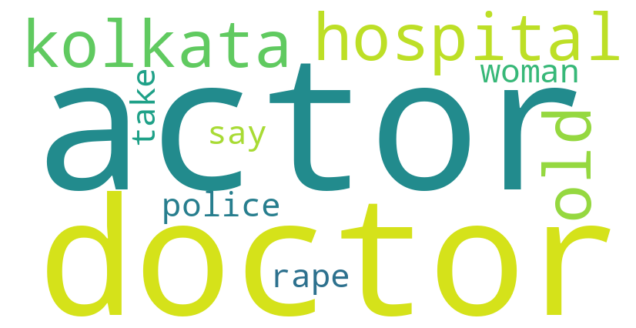

In [ ]:
generate_wordcloud("actor doctor hospital kolkata old police rape say take woman")

# **Sentiment Analysis**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

processed_data = [preprocess_text(text) for text in docs]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
processed_data

['india meteorological department imd issue red alert gujarat monday predict heavy extremely heavy rain state day',
 'deep depression move east rajasthan saurashtra region heavy rain expect continue state till august imd mark gujarat flash flood risk zone',
 'rainfall august cause waterlogging low lying area national disaster response force ndrf carry rescue operation people displace home water inundation',
 'chief minister bhupendra patel office release announce currently valsad tapi navsari surat narmada panchmahal worst hit district',
 'chief minister bhupendra patel monday hold high level meeting state emergency operation center gandhinagar collector municipal commissioner district official ass impact rain state cm patel emphasise need prevent loss life livestock say rescue people priority news agency ani report',
 'accord statement release chief minister office people evacuate people rescue state ndrf team sdrf team deploy affect district carry relief rescue operation',
 'intense 

In [ ]:
from transformers import pipeline

sentiment_model = pipeline("sentiment-analysis")

def analyze_sentiment_bert(text):
    result = sentiment_model(text)[0]
    return result['label'].lower(), result['score']

sentiment_results = [analyze_sentiment_bert(text) for text in processed_data]

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
sentiment_results

[('negative', 0.9712060689926147),
 ('negative', 0.8190780282020569),
 ('negative', 0.9940953254699707),
 ('negative', 0.9996970891952515),
 ('positive', 0.8422945141792297),
 ('negative', 0.9211316704750061),
 ('negative', 0.9961816072463989),
 ('positive', 0.9769600629806519),
 ('negative', 0.9897006750106812),
 ('negative', 0.9713981747627258),
 ('negative', 0.9892488718032837),
 ('negative', 0.9958685636520386),
 ('negative', 0.9929497241973877),
 ('negative', 0.8880385160446167)]

In [ ]:
import pandas as pd

df = pd.DataFrame(sentiment_results, columns=['Sentiment', 'Score'])
df.to_csv('sentiment_analysis_results.csv', index=False)

In [ ]:
import plotly.express as px

# Sentiment Distribution
fig = px.bar(df, x='Sentiment', title='Sentiment Distribution', color='Sentiment',
             category_orders={'Sentiment': ['positive', 'neutral', 'negative']})

fig.show()


In [ ]:
# Sentiment Scores Distribution
fig = px.histogram(df, x='Score', nbins=20, title='Sentiment Scores Distribution',
                   color_discrete_sequence=['#636EFA'])

fig.show()

In [ ]:
import plotly.express as px

# Calculate sentiment distribution
sentiment_counts = df['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

# Create an interactive pie chart
fig = px.pie(
    sentiment_counts,
    values='Count',
    names='Sentiment',
    title='Sentiment Distribution',
    color_discrete_sequence=px.colors.qualitative.Set2,
    hole=0.4  # Creates a donut chart with a hole in the middle
)

# Add more interactive features
fig.update_traces(
    hoverinfo="label+percent+value",  # Shows label, percent, and count on hover
    textinfo='label+percent',         # Shows label and percent on the chart
    pull=[0, 0, 0],                 # Emphasize a specific slice (e.g., first slice)
)

# Show the interactive pie chart
fig.show()


# **Topic Modelling**

In [ ]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from collections import defaultdict
import re

# Create a dictionary and corpus
dictionary = Dictionary([doc.split() for doc in processed_data])
corpus = [dictionary.doc2bow(doc.split()) for doc in processed_data]

# Number of topics
num_topics = 3

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

# Get the topic distribution for each document
document_topics = lda_model[corpus]

# Extract the most important sentences for each topic and identify patterns
topic_patterns = defaultdict(list)
pattern_sentences = defaultdict(list)

for topic_id in range(num_topics):
    max_prob = 0
    important_sentence = None

    # Find the sentence with the highest probability for this topic
    for i, topic_probs in enumerate(document_topics):
        for topic, prob in topic_probs:
            if topic == topic_id and prob > max_prob:
                max_prob = prob
                important_sentence = processed_data[i]

    # Store important sentence and identify common patterns
    if important_sentence:
        print(f"\nTopic {topic_id+1}:")
        print(f" - {important_sentence} (Probability: {max_prob:.4f})")
        topic_patterns[topic_id].append(important_sentence)

        # Example: Extract phrases or patterns (e.g., "delivered a speech", "showing signs of growth")
        phrases = re.findall(r'\b\w+\s\w+\b', important_sentence)
        topic_patterns[topic_id].extend(phrases)

# Match patterns in the entire corpus
for topic_id, patterns in topic_patterns.items():
    pattern_regex = '|'.join([re.escape(p) for p in patterns])
    pattern_compiled = re.compile(pattern_regex, re.IGNORECASE)

    for sentence in processed_data:
        if pattern_compiled.search(sentence):
            pattern_sentences[topic_id].append(sentence)

# Display sentences matching the identified patterns
for topic_id, sentences in pattern_sentences.items():
    print(f"\nTopic {topic_id+1} - Pattern-Matched Sentences:")
    for sentence in sentences:
        print(f" - {sentence}")



Topic 1:
 - imd issue red alert gujarat till august warn traffic disruption damage build structure waterlogging damage crop etc likely place ask citizen stay indoor possible check weather alert venture outside (Probability: 0.9771)

Topic 2:
 - people shift low lie area gujarat bharuch city safe place nearly lakh cusec water release narmada river sardar sarovar dam large discharge water incessant rain lead river float danger level mark foot near bharuch (Probability: 0.9804)

Topic 3:
 - chief minister bhupendra patel monday hold high level meeting state emergency operation center gandhinagar collector municipal commissioner district official ass impact rain state cm patel emphasise need prevent loss life livestock say rescue people priority news agency ani report (Probability: 0.9823)

Topic 1 - Pattern-Matched Sentences:
 - india meteorological department imd issue red alert gujarat monday predict heavy extremely heavy rain state day
 - imd issue red alert gujarat till august warn t

In [ ]:
import pandas as pd
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import plotly.express as px

# Create a dictionary and corpus
dictionary = Dictionary([doc.split() for doc in processed_data])
corpus = [dictionary.doc2bow(doc.split()) for doc in processed_data]

# Number of topics
num_topics = 10

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

# Get the topic distribution for each document
document_topics = lda_model[corpus]

# Initialize lists to store the data for the DataFrame
sentences = []
topics = []
importances = []

# Extract the most important sentence for each topic
for topic_id in range(num_topics):
    max_prob = 0
    important_sentence = None

    # Find the sentence with the highest probability for this topic
    for i, topic_probs in enumerate(document_topics):
        for topic, prob in topic_probs:
            if topic == topic_id and prob > max_prob:
                max_prob = prob
                important_sentence = processed_data[i]

    # If an important sentence is found, store it along with the topic and probability
    if important_sentence:
        sentences.append(important_sentence)
        topics.append(f"Topic {topic_id+1}")
        importances.append(max_prob)

# Create the DataFrame
df = pd.DataFrame({
    "Sentence": sentences,
    "Topic": topics,
    "Importance": importances
})

# Define hover template with customized width for text
hover_template = "<b>Topic:</b> %{x}<br>" \
                 "<b>Importance:</b> %{y:.2f}<br><br>" \
                 "<b>Sentence:</b><br>" \
                 "<span style='width: 120px; word-wrap: break-word;'>%{customdata}</span><extra></extra>"

# Visualization using Plotly with customized style
fig = px.scatter(
    df,
    x="Topic",
    y="Importance",
    size="Importance",
    color="Topic",
    custom_data=["Sentence"],
    title="Topic-wise Important Sentences Visualization",
    labels={"Importance": "Importance (Probability)", "Topic": "Assigned Topic"},
)

# Update hover template for better readability and text wrapping
fig.update_traces(
    marker=dict(opacity=0.8, sizemode='area', sizeref=2.*max(df['Importance'])/(40.**2), line=dict(width=1, color='DarkSlateGrey')),
    selector=dict(mode='markers'),
    hovertemplate=hover_template
)

# Customize the layout for a more creative look
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title_font=dict(size=22, color='black'),
    font=dict(family="Arial", size=14),
    hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"),
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=True, gridcolor='LightGray', zeroline=False),
    margin=dict(l=40, r=40, t=80, b=40),
    showlegend=False,
)

# Display the plot
fig.show()


# **Keywords Extraction**


Document 1 Top 10 Keywords:
['heavy', 'meteorological', 'india', 'predict', 'department', 'day', 'extremely', 'alert', 'red', 'issue']

Document 2 Top 10 Keywords:
['zone', 'region', 'continue', 'saurashtra', 'flood', 'flash', 'deep', 'depression', 'rajasthan', 'expect']

Document 3 Top 10 Keywords:
['displace', 'national', 'inundation', 'force', 'response', 'disaster', 'lying', 'home', 'rainfall', 'cause']

Document 4 Top 10 Keywords:
['panchmahal', 'hit', 'currently', 'surat', 'navsari', 'tapi', 'worst', 'narmada', 'announce', 'bhupendra']

Document 5 Top 10 Keywords:
['patel', 'state', 'priority', 'ass', 'center', 'report', 'collector', 'commissioner', 'life', 'official']

Document 6 Top 10 Keywords:
['team', 'rescue', 'people', 'accord', 'relief', 'evacuate', 'deploy', 'statement', 'office', 'sdrf']

Document 7 Top 10 Keywords:
['pansheriya', 'school', 'primary', 'tuesday', 'praful', 'intense', 'closed', 'education', 'announce', 'remain']

Document 8 Top 10 Keywords:
['rainfall', 

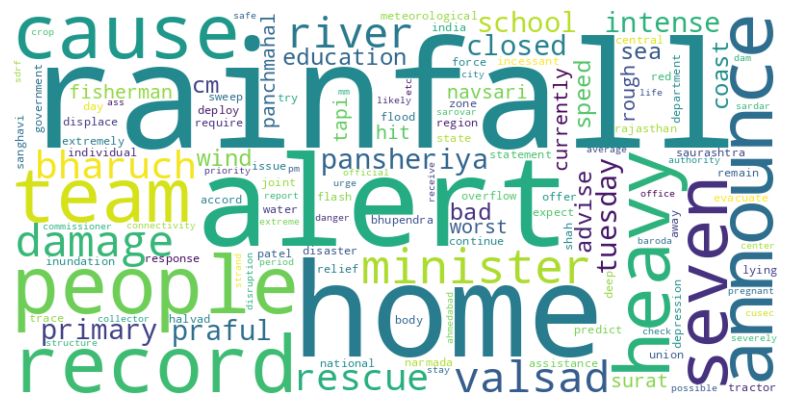

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=1000)

# Fit and transform the data
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_data)

# Extract the feature names (i.e., the words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame with the TF-IDF scores
import pandas as pd
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Display the top keywords for each document
top_n = 10
for i, row in tfidf_df.iterrows():
    print(f"\nDocument {i+1} Top {top_n} Keywords:")
    top_keywords = row.sort_values(ascending=False).head(top_n)
    print(top_keywords.index.tolist())


import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd

# Combine top keywords across all documents into a single dictionary
top_n = 10
word_freq = {}

for i, row in tfidf_df.iterrows():
    top_keywords = row.sort_values(ascending=False).head(top_n)
    for word, score in top_keywords.items():
        if word in word_freq:
            word_freq[word] += score
        else:
            word_freq[word] = score

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Convert the word cloud to an image format for Plotly
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

# Save the word cloud as an image file
wordcloud.to_file("wordcloud.png")

# Create interactive Plotly figure
fig = px.imshow(wordcloud)

# Update layout for interactivity
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False, visible=False),
    yaxis=dict(showgrid=False, zeroline=False, visible=False),
    title_text='Interactive Word Cloud from TF-IDF Keywords',
    title_x=0.5,
)


In [ ]:
import gradio as gr
import pandas as pd
import plotly.express as px
from transformers import pipeline

# Initialize the BERT sentiment analysis model
sentiment_model = pipeline("sentiment-analysis")

def analyze_sentiment_bert(text):
    result = sentiment_model(text)[0]
    return result['label'].lower(), result['score']

# Analyze sentiment for each document
sentiment_results = [analyze_sentiment_bert(text) for text in processed_data]

# Create a DataFrame
df = pd.DataFrame(sentiment_results, columns=['Sentiment', 'Score'])

# Sentiment Scores Distribution
def plot_sentiment_distribution():
    fig = px.histogram(df, x='Score', nbins=20, title='Sentiment Scores Distribution',
                       color_discrete_sequence=['#636EFA'])
    return fig

# Sentiment Pie Chart
def plot_sentiment_pie_chart():
    sentiment_counts = df['Sentiment'].value_counts().reset_index()
    sentiment_counts.columns = ['Sentiment', 'Count']

    fig = px.pie(
        sentiment_counts,
        values='Count',
        names='Sentiment',
        title='Sentiment Distribution',
        color_discrete_sequence=px.colors.qualitative.Set2,
        hole=0.4  # Creates a donut chart
    )

    # Add more interactive features
    fig.update_traces(
        hoverinfo="label+percent+value",
        textinfo='label+percent',
        pull=[0, 0, 0],
    )

    return fig

# Gradio interface functions
def display_histogram():
    fig = plot_sentiment_distribution()
    return fig

def display_pie_chart():
    fig = plot_sentiment_pie_chart()
    return fig

# Gradio Interface
with gr.Blocks() as demo:
    gr.Markdown("## Sentiment Analysis Dashboard")

    with gr.Row():
        gr.Markdown("### Sentiment Scores Distribution")
        gr.Plot(display_histogram)

    with gr.Row():
        gr.Markdown("### Sentiment Distribution")
        gr.Plot(display_pie_chart)

# Launch the Gradio interface
demo.launch()


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://14c5f25f0f0afe19b3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import pandas as pd
import plotly.express as px
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from transformers import pipeline

# Sentiment Analysis Model
sentiment_model = pipeline("sentiment-analysis")

def analyze_sentiment_bert(text):
    result = sentiment_model(text)[0]
    return result['label'].lower(), result['score']

def generate_sentiment_visualizations():
    sentiment_results = [analyze_sentiment_bert(text) for text in processed_data]

    # Create DataFrame
    df = pd.DataFrame(sentiment_results, columns=['Sentiment', 'Score'])

    # Sentiment Scores Distribution
    fig1 = px.histogram(df, x='Score', nbins=20, title='Sentiment Scores Distribution',
                        color_discrete_sequence=['#636EFA'])

    # Sentiment Distribution Pie Chart
    sentiment_counts = df['Sentiment'].value_counts().reset_index()
    sentiment_counts.columns = ['Sentiment', 'Count']

    fig2 = px.pie(
        sentiment_counts,
        values='Count',
        names='Sentiment',
        title='Sentiment Distribution',
        color_discrete_sequence=px.colors.qualitative.Set2,
        hole=0.4
    )

    # Add interactive features
    fig2.update_traces(
        hoverinfo="label+percent+value",
        textinfo='label+percent',
        pull=[0, 0, 0]
    )

    return fig1, fig2

def generate_topic_visualization(num_topics):
    # Create a dictionary and corpus
    dictionary = Dictionary([doc.split() for doc in processed_data])
    corpus = [dictionary.doc2bow(doc.split()) for doc in processed_data]

    # Train the LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

    # Get the topic distribution for each document
    document_topics = lda_model[corpus]

    # Initialize lists to store the data for the DataFrame
    sentences = []
    topics = []
    importances = []

    # Extract the most important sentence for each topic
    for topic_id in range(num_topics):
        max_prob = 0
        important_sentence = None

        # Find the sentence with the highest probability for this topic
        for i, topic_probs in enumerate(document_topics):
            for topic, prob in topic_probs:
                if topic == topic_id and prob > max_prob:
                    max_prob = prob
                    important_sentence = processed_data[i]

        # If an important sentence is found, store it along with the topic and probability
        if important_sentence:
            sentences.append(important_sentence)
            topics.append(f"Topic {topic_id+1}")
            importances.append(max_prob)

    # Create the DataFrame
    df = pd.DataFrame({
        "Sentence": sentences,
        "Topic": topics,
        "Importance": importances
    })

    # Define hover template with customized width for text
    hover_template = "<b>Topic:</b> %{x}<br>" \
                     "<b>Importance:</b> %{y:.2f}<br><br>" \
                     "<b>Sentence:</b><br>" \
                     "<span style='width: 120px; word-wrap: break-word;'>%{customdata}</span><extra></extra>"

    # Visualization using Plotly with customized style
    fig = px.scatter(
        df,
        x="Topic",
        y="Importance",
        size="Importance",
        color="Topic",
        custom_data=["Sentence"],
        title="Topic-wise Important Sentences Visualization",
        labels={"Importance": "Importance (Probability)", "Topic": "Assigned Topic"},
    )

    # Update hover template for better readability and text wrapping
    fig.update_traces(
        marker=dict(opacity=0.8, sizemode='area', sizeref=2.*max(df['Importance'])/(40.**2), line=dict(width=1, color='DarkSlateGrey')),
        selector=dict(mode='markers'),
        hovertemplate=hover_template
    )

    # Customize the layout for a more creative look
    fig.update_layout(
        plot_bgcolor='white',
        paper_bgcolor='white',
        title_font=dict(size=22, color='black'),
        font=dict(family="Arial", size=14),
        hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"),
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=True, gridcolor='LightGray', zeroline=False),
        margin=dict(l=40, r=40, t=80, b=40),
        showlegend=False,
    )

    return fig

# Gradio Interface
with gr.Blocks() as demo:
    gr.Markdown("## Combined Dashboard: Sentiment Analysis and Topic Modeling")

    # Sentiment Analysis
    gr.Markdown("### Sentiment Analysis")
    with gr.Row():
        sentiment_hist = gr.Plot(generate_sentiment_visualizations()[0], label="Sentiment Scores Distribution")
        sentiment_pie = gr.Plot(generate_sentiment_visualizations()[1], label="Sentiment Distribution")

    # Topic Modeling
    gr.Markdown("### Topic Modeling")
    num_topics_input = gr.Slider(minimum=2, maximum=15, value=10, step=1, label="Number of Topics")
    topic_plot = gr.Plot(generate_topic_visualization(10), label="Topic-wise Important Sentences Visualization")

    # Update Topic Visualization based on slider input
    def update_topic_plot(num_topics):
        return generate_topic_visualization(num_topics)

    num_topics_input.change(fn=update_topic_plot, inputs=num_topics_input, outputs=topic_plot)

    # Display the interface
    demo.launch()


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://fd78e6f3b457f5b512.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import plotly.express as px
import gradio as gr
import numpy as np
from PIL import Image
import pandas as pd

# TF-IDF Vectorizer and Data Preparation (As provided)
from sklearn.feature_extraction.text import TfidfVectorizer


# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=1000)

# Fit and transform the data
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_data)

# Extract the feature names (i.e., the words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame with the TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Combine top keywords across all documents into a single dictionary
top_n = 10
word_freq = {}

for i, row in tfidf_df.iterrows():
    top_keywords = row.sort_values(ascending=False).head(top_n)
    for word, score in top_keywords.items():
        if word in word_freq:
            word_freq[word] += score
        else:
            word_freq[word] = score

# Generate an attractive word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      contour_color='steelblue', contour_width=1).generate_from_frequencies(word_freq)

# Save the word cloud as an image file
wordcloud.to_file("wordcloud.png")

# Function to display the word cloud in Gradio
def display_wordcloud():
    # Return the path to the saved word cloud image
    return "wordcloud.png"

# Gradio Interface
with gr.Blocks() as dashboard:
    gr.Markdown("## Interactive TF-IDF Word Cloud")
    gr.Markdown("Explore the most important keywords extracted from your documents using TF-IDF.")
    wordcloud_img = gr.Image(display_wordcloud, label="TF-IDF Word Cloud", interactive=False)

    # Additional components and customizations can be added here

    dashboard.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://449bd3285137c624a9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import pandas as pd
import plotly.express as px
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from transformers import pipeline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer

# Sentiment Analysis Model
sentiment_model = pipeline("sentiment-analysis")

def analyze_sentiment_bert(text):
    result = sentiment_model(text)[0]
    return result['label'].lower(), result['score']

def generate_sentiment_visualizations():
    sentiment_results = [analyze_sentiment_bert(text) for text in processed_data]

    # Create DataFrame
    df = pd.DataFrame(sentiment_results, columns=['Sentiment', 'Score'])

    # Sentiment Scores Distribution
    fig1 = px.histogram(df, x='Score', nbins=20, title='Sentiment Scores Distribution',
                        color_discrete_sequence=['#636EFA'])

    # Sentiment Distribution Pie Chart
    sentiment_counts = df['Sentiment'].value_counts().reset_index()
    sentiment_counts.columns = ['Sentiment', 'Count']

    fig2 = px.pie(
        sentiment_counts,
        values='Count',
        names='Sentiment',
        title='Sentiment Distribution',
        color_discrete_sequence=px.colors.qualitative.Set2,
        hole=0.4
    )

    # Add interactive features
    fig2.update_traces(
        hoverinfo="label+percent+value",
        textinfo='label+percent',
        pull=[0, 0, 0]
    )

    return fig1, fig2

def generate_topic_visualization(num_topics):
    # Create a dictionary and corpus
    dictionary = Dictionary([doc.split() for doc in processed_data])
    corpus = [dictionary.doc2bow(doc.split()) for doc in processed_data]

    # Train the LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

    # Get the topic distribution for each document
    document_topics = lda_model[corpus]

    # Initialize lists to store the data for the DataFrame
    sentences = []
    topics = []
    importances = []

    # Extract the most important sentence for each topic
    for topic_id in range(num_topics):
        max_prob = 0
        important_sentence = None

        # Find the sentence with the highest probability for this topic
        for i, topic_probs in enumerate(document_topics):
            for topic, prob in topic_probs:
                if topic == topic_id and prob > max_prob:
                    max_prob = prob
                    important_sentence = processed_data[i]

        # If an important sentence is found, store it along with the topic and probability
        if important_sentence:
            sentences.append(important_sentence)
            topics.append(f"Topic {topic_id+1}")
            importances.append(max_prob)

    # Create the DataFrame
    df = pd.DataFrame({
        "Sentence": sentences,
        "Topic": topics,
        "Importance": importances
    })

    # Define hover template with customized width for text
    hover_template = "<b>Topic:</b> %{x}<br>" \
                     "<b>Importance:</b> %{y:.2f}<br><br>" \
                     "<b>Sentence:</b><br>" \
                     "<span style='width: 120px; word-wrap: break-word;'>%{customdata}</span><extra></extra>"

    # Visualization using Plotly with customized style
    fig = px.scatter(
        df,
        x="Topic",
        y="Importance",
        size="Importance",
        color="Topic",
        custom_data=["Sentence"],
        title="Topic-wise Important Sentences Visualization",
        labels={"Importance": "Importance (Probability)", "Topic": "Assigned Topic"},
    )

    # Update hover template for better readability and text wrapping
    fig.update_traces(
        marker=dict(opacity=0.8, sizemode='area', sizeref=2.*max(df['Importance'])/(40.**2), line=dict(width=1, color='DarkSlateGrey')),
        selector=dict(mode='markers'),
        hovertemplate=hover_template
    )

    # Customize the layout for a more creative look
    fig.update_layout(
        plot_bgcolor='white',
        paper_bgcolor='white',
        title_font=dict(size=22, color='black'),
        font=dict(family="Arial", size=14),
        hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"),
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=True, gridcolor='LightGray', zeroline=False),
        margin=dict(l=40, r=40, t=80, b=40),
        showlegend=False,
    )

    return fig

# TF-IDF Vectorizer and Data Preparation
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_data)
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Combine top keywords across all documents into a single dictionary
top_n = 10
word_freq = {}

for i, row in tfidf_df.iterrows():
    top_keywords = row.sort_values(ascending=False).head(top_n)
    for word, score in top_keywords.items():
        if word in word_freq:
            word_freq[word] += score
        else:
            word_freq[word] = score

# Generate an attractive word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      contour_color='steelblue', contour_width=1).generate_from_frequencies(word_freq)

# Save the word cloud as an image file
wordcloud.to_file("wordcloud.png")

# Function to display the word cloud in Gradio
def display_wordcloud():
    return "wordcloud.png"

# Gradio Interface
with gr.Blocks() as demo:
    gr.Markdown("## Combined Dashboard: Sentiment Analysis, Topic Modeling, and TF-IDF Word Cloud")

    # Sentiment Analysis
    gr.Markdown("### Sentiment Analysis")
    with gr.Row():
        sentiment_hist = gr.Plot(generate_sentiment_visualizations()[0], label="Sentiment Scores Distribution")
        sentiment_pie = gr.Plot(generate_sentiment_visualizations()[1], label="Sentiment Distribution")

    # Topic Modeling
    gr.Markdown("### Topic Modeling")
    num_topics_input = gr.Slider(minimum=2, maximum=15, value=10, step=1, label="Number of Topics")
    topic_plot = gr.Plot(generate_topic_visualization(10), label="Topic-wise Important Sentences Visualization")

    # Update Topic Visualization based on slider input
    def update_topic_plot(num_topics):
        return generate_topic_visualization(num_topics)

    num_topics_input.change(fn=update_topic_plot, inputs=num_topics_input, outputs=topic_plot)

    # TF-IDF Word Cloud
    gr.Markdown("### TF-IDF Word Cloud")
    wordcloud_img = gr.Image(display_wordcloud, label="TF-IDF Word Cloud", interactive=False)

    # Display the interface
    demo.launch()


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3d82d4825a4561e0b5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# **joining Multiple Json File Content**

In [ ]:
import json
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize the text
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(tokens)  # Join tokens back into a single string


def process_multiple_files(directory_path):
    processed_data = []

    # Iterate over all files in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith('.json'):
            file_path = os.path.join(directory_path, filename)

            # Process each file
            with open(file_path, 'r') as f:
                data = json.load(f)

                # Preprocess the 'content' field from each item in the JSON
                processed_data.extend([preprocess_text(item['text']) for item in data])

    return processed_data


directory_path = '/content/Json Files'
processed_data = process_multiple_files(directory_path)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
processed_data

['kerala police monday filed fir filmmaker ranjith first one amid several recent sexual harassment allegation made male actor mollywood case registered bengali actress sreelekha mitra filed complaint filmmaker kochi city police commissioner',
 'complaint sent via email police alleged',
 'sexual intent inviting act movie paleri manikyam',
 'according kochi police commissioner syamsundar case ipc section assault criminal force woman intent outrage modesty registered reported pti',
 'saturday sreelekha mitra accused ranjith making advance misbehaving discussing script year ago',
 'person concerned ranjith big name malayalam film industry national director went residence discus upcoming film project like behaviour made certain advance subtly felt uncomfortable discussing script pti quoted saying',
 'actor said following misbehaviour refused part project returned kolkata',
 'know treated female actor film industry way open faced similar situation maybe power influence played role others spe

# **Single Dashboard for multiple Json File**

In [ ]:
import json
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import gradio as gr
import pandas as pd
import plotly.express as px
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from transformers import pipeline
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# NLTK Preprocessing Setup
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

def process_multiple_files(directory_path):
    processed_data = []
    for filename in os.listdir(directory_path):
        if filename.endswith('.json'):
            file_path = os.path.join(directory_path, filename)
            with open(file_path, 'r') as f:
                data = json.load(f)
                processed_data.extend([preprocess_text(item['text']) for item in data])
    return processed_data

# Sentiment Analysis Model
sentiment_model = pipeline("sentiment-analysis")

def analyze_sentiment_bert(text):
    result = sentiment_model(text)[0]
    return result['label'].lower(), result['score']

def generate_sentiment_visualizations(processed_data):
    sentiment_results = [analyze_sentiment_bert(text) for text in processed_data]
    df = pd.DataFrame(sentiment_results, columns=['Sentiment', 'Score'])

    fig1 = px.histogram(df, x='Score', nbins=20, title='Sentiment Scores Distribution',
                        color_discrete_sequence=['#636EFA'])

    sentiment_counts = df['Sentiment'].value_counts().reset_index()
    sentiment_counts.columns = ['Sentiment', 'Count']

    fig2 = px.pie(
        sentiment_counts,
        values='Count',
        names='Sentiment',
        title='Sentiment Distribution',
        color_discrete_sequence=px.colors.qualitative.Set2,
        hole=0.4
    )

    fig2.update_traces(
        hoverinfo="label+percent+value",
        textinfo='label+percent',
        pull=[0, 0, 0]
    )

    return fig1, fig2

def generate_topic_visualization(processed_data, num_topics):
    dictionary = Dictionary([doc.split() for doc in processed_data])
    corpus = [dictionary.doc2bow(doc.split()) for doc in processed_data]

    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

    document_topics = lda_model[corpus]
    sentences, topics, importances = [], [], []

    for topic_id in range(num_topics):
        max_prob = 0
        important_sentence = None

        for i, topic_probs in enumerate(document_topics):
            for topic, prob in topic_probs:
                if topic == topic_id and prob > max_prob:
                    max_prob = prob
                    important_sentence = processed_data[i]

        if important_sentence:
            sentences.append(important_sentence)
            topics.append(f"Topic {topic_id+1}")
            importances.append(max_prob)

    df = pd.DataFrame({
        "Sentence": sentences,
        "Topic": topics,
        "Importance": importances
    })

    hover_template = "<b>Topic:</b> %{x}<br>" \
                     "<b>Importance:</b> %{y:.2f}<br><br>" \
                     "<b>Sentence:</b><br>" \
                     "<span style='width: 120px; word-wrap: break-word;'>%{customdata}</span><extra></extra>"

    fig = px.scatter(
        df,
        x="Topic",
        y="Importance",
        size="Importance",
        color="Topic",
        custom_data=["Sentence"],
        title="Topic-wise Important Sentences Visualization",
        labels={"Importance": "Importance (Probability)", "Topic": "Assigned Topic"},
    )

    fig.update_traces(
        marker=dict(opacity=0.8, sizemode='area', sizeref=2.*max(df['Importance'])/(40.**2), line=dict(width=1, color='DarkSlateGrey')),
        selector=dict(mode='markers'),
        hovertemplate=hover_template
    )

    fig.update_layout(
        plot_bgcolor='white',
        paper_bgcolor='white',
        title_font=dict(size=22, color='black'),
        font=dict(family="Arial", size=14),
        hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"),
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=True, gridcolor='LightGray', zeroline=False),
        margin=dict(l=40, r=40, t=80, b=40),
        showlegend=False,
    )

    return fig

def generate_wordcloud(processed_data):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=1000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(processed_data)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

    top_n = 10
    word_freq = {}

    for i, row in tfidf_df.iterrows():
        top_keywords = row.sort_values(ascending=False).head(top_n)
        for word, score in top_keywords.items():
            if word in word_freq:
                word_freq[word] += score
            else:
                word_freq[word] = score

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                          contour_color='steelblue', contour_width=1).generate_from_frequencies(word_freq)

    wordcloud.to_file("wordcloud.png")
    return "wordcloud.png"

# Gradio Interface
def dashboard(directory_path):
    processed_data = process_multiple_files(directory_path)

    sentiment_hist, sentiment_pie = generate_sentiment_visualizations(processed_data)
    num_topics = 10
    topic_plot = generate_topic_visualization(processed_data, num_topics)
    wordcloud_img = generate_wordcloud(processed_data)

    with gr.Blocks() as demo:
        gr.Markdown("## Combined Dashboard: Sentiment Analysis, Topic Modeling, and TF-IDF Word Cloud")

        gr.Markdown("### Sentiment Analysis")
        with gr.Row():
            gr.Plot(sentiment_hist, label="Sentiment Scores Distribution")
            gr.Plot(sentiment_pie, label="Sentiment Distribution")

        gr.Markdown("### Topic Modeling")
        num_topics_input = gr.Slider(minimum=2, maximum=25, value=num_topics, step=1, label="Number of Topics")
        topic_plot_widget = gr.Plot(topic_plot, label="Topic-wise Important Sentences Visualization")

        def update_topic_plot(num_topics):
            return generate_topic_visualization(processed_data, num_topics)

        num_topics_input.change(fn=update_topic_plot, inputs=num_topics_input, outputs=topic_plot_widget)

        gr.Markdown("### TF-IDF Word Cloud")
        gr.Image(wordcloud_img, label="TF-IDF Word Cloud", interactive=False)

        demo.launch()

directory_path = '/content/Json Files'
dashboard(directory_path)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://74cf28507088b275ce.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# **Dashboard for each Json File**

In [ ]:
import gradio as gr
import pandas as pd
import plotly.express as px
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from transformers import pipeline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import json
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

def process_file(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return [preprocess_text(item['text']) for item in data]

# Sentiment Analysis Model
sentiment_model = pipeline("sentiment-analysis")

def analyze_sentiment_bert(text):
    result = sentiment_model(text)[0]
    return result['label'].lower(), result['score']

def generate_sentiment_visualizations(processed_data):
    sentiment_results = [analyze_sentiment_bert(text) for text in processed_data]

    df = pd.DataFrame(sentiment_results, columns=['Sentiment', 'Score'])

    fig1 = px.histogram(df, x='Score', nbins=20, title='Sentiment Scores Distribution',
                        color_discrete_sequence=['#636EFA'])

    sentiment_counts = df['Sentiment'].value_counts().reset_index()
    sentiment_counts.columns = ['Sentiment', 'Count']

    fig2 = px.pie(
        sentiment_counts,
        values='Count',
        names='Sentiment',
        title='Sentiment Distribution',
        color_discrete_sequence=px.colors.qualitative.Set2,
        hole=0.4
    )

    fig2.update_traces(
        hoverinfo="label+percent+value",
        textinfo='label+percent',
        pull=[0, 0, 0]
    )

    return fig1, fig2

def generate_topic_visualization(processed_data, num_topics):
    dictionary = Dictionary([doc.split() for doc in processed_data])
    corpus = [dictionary.doc2bow(doc.split()) for doc in processed_data]

    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

    document_topics = lda_model[corpus]

    sentences = []
    topics = []
    importances = []

    for topic_id in range(num_topics):
        max_prob = 0
        important_sentence = None

        for i, topic_probs in enumerate(document_topics):
            for topic, prob in topic_probs:
                if topic == topic_id and prob > max_prob:
                    max_prob = prob
                    important_sentence = processed_data[i]

        if important_sentence:
            sentences.append(important_sentence)
            topics.append(f"Topic {topic_id+1}")
            importances.append(max_prob)

    df = pd.DataFrame({
        "Sentence": sentences,
        "Topic": topics,
        "Importance": importances
    })

    hover_template = "<b>Topic:</b> %{x}<br>" \
                     "<b>Importance:</b> %{y:.2f}<br><br>" \
                     "<b>Sentence:</b><br>" \
                     "<span style='width: 120px; word-wrap: break-word;'>%{customdata}</span><extra></extra>"

    fig = px.scatter(
        df,
        x="Topic",
        y="Importance",
        size="Importance",
        color="Topic",
        custom_data=["Sentence"],
        title="Topic-wise Important Sentences Visualization",
        labels={"Importance": "Importance (Probability)", "Topic": "Assigned Topic"},
    )

    fig.update_traces(
        marker=dict(opacity=0.8, sizemode='area', sizeref=2.*max(df['Importance'])/(40.**2), line=dict(width=1, color='DarkSlateGrey')),
        selector=dict(mode='markers'),
        hovertemplate=hover_template
    )

    fig.update_layout(
        plot_bgcolor='white',
        paper_bgcolor='white',
        title_font=dict(size=22, color='black'),
        font=dict(family="Arial", size=14),
        hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"),
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=True, gridcolor='LightGray', zeroline=False),
        margin=dict(l=40, r=40, t=80, b=40),
        showlegend=False,
    )

    return fig

def generate_wordcloud(processed_data):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=1000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(processed_data)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

    top_n = 10
    word_freq = {}

    for i, row in tfidf_df.iterrows():
        top_keywords = row.sort_values(ascending=False).head(top_n)
        for word, score in top_keywords.items():
            if word in word_freq:
                word_freq[word] += score
            else:
                word_freq[word] = score

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                          contour_color='steelblue', contour_width=1).generate_from_frequencies(word_freq)

    wordcloud.to_file("wordcloud.png")
    return "wordcloud.png"

def dashboard(directory_path):
    with gr.Blocks() as demo:
        gr.Markdown("## Combined Dashboard: Sentiment Analysis, Topic Modeling, and TF-IDF Word Cloud")

        for filename in os.listdir(directory_path):
            if filename.endswith('.json'):
                file_path = os.path.join(directory_path, filename)
                processed_data = process_file(file_path)

                gr.Markdown(f"### Analysis for {filename}")

                # Sentiment Analysis
                gr.Markdown("#### Sentiment Analysis")
                sentiment_hist, sentiment_pie = generate_sentiment_visualizations(processed_data)
                with gr.Row():
                    gr.Plot(sentiment_hist, label="Sentiment Scores Distribution")
                    gr.Plot(sentiment_pie, label="Sentiment Distribution")

                # Topic Modeling
                gr.Markdown("#### Topic Modeling")
                num_topics_input = gr.Slider(minimum=2, maximum=25, value=15, step=2, label="Number of Topics")
                topic_plot = gr.Plot(generate_topic_visualization(processed_data, 15), label="Topic-wise Important Sentences Visualization")

                # Update Topic Visualization based on slider input
                def update_topic_plot(num_topics):
                    return generate_topic_visualization(processed_data, num_topics)

                num_topics_input.change(fn=update_topic_plot, inputs=num_topics_input, outputs=topic_plot)

                # TF-IDF Word Cloud
                gr.Markdown("#### TF-IDF Word Cloud")
                wordcloud_img = gr.Image(generate_wordcloud(processed_data), label="TF-IDF Word Cloud", interactive=False)

    demo.launch()

# To run the dashboard, provide the path to the directory containing JSON files:
directory_path = '/content/Json Files'
dashboard(directory_path)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reu

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d45ae813792415806b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


#**Anamoly Detection**

In [ ]:
import gradio as gr
import pandas as pd
import plotly.express as px
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from transformers import pipeline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import json
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import IsolationForest

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

def process_file(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return [preprocess_text(item['text']) for item in data]

# Sentiment Analysis Model
sentiment_model = pipeline("sentiment-analysis")

def analyze_sentiment_bert(text):
    result = sentiment_model(text)[0]
    return result['label'].lower(), result['score']

def generate_sentiment_visualizations(processed_data):
    sentiment_results = [analyze_sentiment_bert(text) for text in processed_data]

    df = pd.DataFrame(sentiment_results, columns=['Sentiment', 'Score'])

    fig1 = px.histogram(df, x='Score', nbins=20, title='Sentiment Scores Distribution',
                        color_discrete_sequence=['#636EFA'])

    sentiment_counts = df['Sentiment'].value_counts().reset_index()
    sentiment_counts.columns = ['Sentiment', 'Count']

    fig2 = px.pie(
        sentiment_counts,
        values='Count',
        names='Sentiment',
        title='Sentiment Distribution',
        color_discrete_sequence=px.colors.qualitative.Set2,
        hole=0.4
    )

    fig2.update_traces(
        hoverinfo="label+percent+value",
        textinfo='label+percent',
        pull=[0, 0, 0]
    )

    return fig1, fig2

def generate_topic_visualization(processed_data, num_topics):
    dictionary = Dictionary([doc.split() for doc in processed_data])
    corpus = [dictionary.doc2bow(doc.split()) for doc in processed_data]

    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

    document_topics = lda_model[corpus]

    sentences = []
    topics = []
    importances = []

    for topic_id in range(num_topics):
        max_prob = 0
        important_sentence = None

        for i, topic_probs in enumerate(document_topics):
            for topic, prob in topic_probs:
                if topic == topic_id and prob > max_prob:
                    max_prob = prob
                    important_sentence = processed_data[i]

        if important_sentence:
            sentences.append(important_sentence)
            topics.append(f"Topic {topic_id+1}")
            importances.append(max_prob)

    df = pd.DataFrame({
        "Sentence": sentences,
        "Topic": topics,
        "Importance": importances
    })

    hover_template = "<b>Topic:</b> %{x}<br>" \
                     "<b>Importance:</b> %{y:.2f}<br><br>" \
                     "<b>Sentence:</b><br>" \
                     "<span style='width: 120px; word-wrap: break-word;'>%{customdata}</span><extra></extra>"

    fig = px.scatter(
        df,
        x="Topic",
        y="Importance",
        size="Importance",
        color="Topic",
        custom_data=["Sentence"],
        title="Topic-wise Important Sentences Visualization",
        labels={"Importance": "Importance (Probability)", "Topic": "Assigned Topic"},
    )

    fig.update_traces(
        marker=dict(opacity=0.8, sizemode='area', sizeref=2.*max(df['Importance'])/(40.**2), line=dict(width=1, color='DarkSlateGrey')),
        selector=dict(mode='markers'),
        hovertemplate=hover_template
    )

    fig.update_layout(
        plot_bgcolor='white',
        paper_bgcolor='white',
        title_font=dict(size=22, color='black'),
        font=dict(family="Arial", size=14),
        hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"),
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=True, gridcolor='LightGray', zeroline=False),
        margin=dict(l=40, r=40, t=80, b=40),
        showlegend=False,
    )

    return fig

def generate_wordcloud(processed_data):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=1000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(processed_data)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

    top_n = 10
    word_freq = {}

    for i, row in tfidf_df.iterrows():
        top_keywords = row.sort_values(ascending=False).head(top_n)
        for word, score in top_keywords.items():
            if word in word_freq:
                word_freq[word] += score
            else:
                word_freq[word] = score

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                          contour_color='steelblue', contour_width=1).generate_from_frequencies(word_freq)

    wordcloud.to_file("wordcloud.png")
    return "wordcloud.png"

def detect_anomalies(processed_data):
    # Filter out empty strings from the processed data
    processed_data = [doc for doc in processed_data if doc.strip() != '']

    if len(processed_data) == 0:
        return []

    # Vectorize the data using TF-IDF
    vectorizer = TfidfVectorizer(max_features=100)
    X = vectorizer.fit_transform(processed_data).toarray()

    # Fit the model
    iso_forest = IsolationForest(contamination=0.1)
    anomalies = iso_forest.fit_predict(X)

    # Return the sentences marked as anomalies
    anomalous_sentences = [processed_data[i] for i, flag in enumerate(anomalies) if flag == -1]
    return anomalous_sentences

def dashboard(directory_path):
    with gr.Blocks() as demo:
        gr.Markdown("## Combined Dashboard: Sentiment Analysis, Topic Modeling, and TF-IDF Word Cloud")

        for filename in os.listdir(directory_path):
            if filename.endswith('.json'):
                file_path = os.path.join(directory_path, filename)
                processed_data = process_file(file_path)

                gr.Markdown(f"### Analysis for {filename}")

                # Sentiment Analysis
                gr.Markdown("#### Sentiment Analysis")
                sentiment_hist, sentiment_pie = generate_sentiment_visualizations(processed_data)
                with gr.Row():
                    gr.Plot(sentiment_hist, label="Sentiment Scores Distribution")
                    gr.Plot(sentiment_pie, label="Sentiment Distribution")

                # Topic Modeling
                gr.Markdown("#### Topic Modeling")
                num_topics_input = gr.Slider(minimum=2, maximum=25, value=15, step=2, label="Number of Topics")
                topic_plot = gr.Plot(generate_topic_visualization(processed_data, 15), label="Topic-wise Important Sentences Visualization")

                # Update Topic Visualization based on slider input
                def update_topic_plot(num_topics):
                    return generate_topic_visualization(processed_data, num_topics)

                num_topics_input.change(fn=update_topic_plot, inputs=num_topics_input, outputs=topic_plot)

                # TF-IDF Word Cloud
                gr.Markdown("#### TF-IDF Word Cloud")
                wordcloud_img = gr.Image(generate_wordcloud(processed_data), label="TF-IDF Word Cloud", interactive=False)

                anomalies_output = detect_anomalies(processed_data)
                gr.Textbox(value="\n".join(anomalies_output), label="Anomalous Sentences", lines=5)

    demo.launch()

# To run the dashboard, provide the path to the directory containing JSON files:
directory_path = '/content/Json Files'
dashboard(directory_path)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://fed85d5ad815ab50e5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# **Each Tab section for Json File**

In [ ]:
import gradio as gr
import pandas as pd
import plotly.express as px
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from transformers import pipeline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import json
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import IsolationForest

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

def process_file(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return [preprocess_text(item['text']) for item in data]

# Sentiment Analysis Model
sentiment_model = pipeline("sentiment-analysis")

def analyze_sentiment_bert(text):
    result = sentiment_model(text)[0]
    return result['label'].lower(), result['score']

def generate_sentiment_visualizations(processed_data):
    sentiment_results = [analyze_sentiment_bert(text) for text in processed_data]

    df = pd.DataFrame(sentiment_results, columns=['Sentiment', 'Score'])

    fig1 = px.histogram(df, x='Score', nbins=20, title='Sentiment Scores Distribution',
                        color_discrete_sequence=['#636EFA'])

    sentiment_counts = df['Sentiment'].value_counts().reset_index()
    sentiment_counts.columns = ['Sentiment', 'Count']

    fig2 = px.pie(
        sentiment_counts,
        values='Count',
        names='Sentiment',
        title='Sentiment Distribution',
        color_discrete_sequence=px.colors.qualitative.Set2,
        hole=0.4
    )

    fig2.update_traces(
        hoverinfo="label+percent+value",
        textinfo='label+percent',
        pull=[0, 0, 0]
    )

    return fig1, fig2

def generate_topic_visualization(processed_data, num_topics):
    dictionary = Dictionary([doc.split() for doc in processed_data])
    corpus = [dictionary.doc2bow(doc.split()) for doc in processed_data]

    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

    document_topics = lda_model[corpus]

    sentences = []
    topics = []
    importances = []

    for topic_id in range(num_topics):
        max_prob = 0
        important_sentence = None

        for i, topic_probs in enumerate(document_topics):
            for topic, prob in topic_probs:
                if topic == topic_id and prob > max_prob:
                    max_prob = prob
                    important_sentence = processed_data[i]

        if important_sentence:
            sentences.append(important_sentence)
            topics.append(f"Topic {topic_id+1}")
            importances.append(max_prob)

    df = pd.DataFrame({
        "Sentence": sentences,
        "Topic": topics,
        "Importance": importances
    })

    hover_template = "<b>Topic:</b> %{x}<br>" \
                     "<b>Importance:</b> %{y:.2f}<br><br>" \
                     "<b>Sentence:</b><br>" \
                     "<span style='width: 120px; word-wrap: break-word;'>%{customdata}</span><extra></extra>"

    fig = px.scatter(
        df,
        x="Topic",
        y="Importance",
        size="Importance",
        color="Topic",
        custom_data=["Sentence"],
        title="Topic-wise Important Sentences Visualization",
        labels={"Importance": "Importance (Probability)", "Topic": "Assigned Topic"},
    )

    fig.update_traces(
        marker=dict(opacity=0.8, sizemode='area', sizeref=2.*max(df['Importance'])/(40.**2), line=dict(width=1, color='DarkSlateGrey')),
        selector=dict(mode='markers'),
        hovertemplate=hover_template
    )

    fig.update_layout(
        plot_bgcolor='white',
        paper_bgcolor='white',
        title_font=dict(size=22, color='black'),
        font=dict(family="Arial", size=14),
        hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"),
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=True, gridcolor='LightGray', zeroline=False),
        margin=dict(l=40, r=40, t=80, b=40),
        showlegend=False,
    )

    return fig

def generate_wordcloud(processed_data):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=1000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(processed_data)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

    top_n = 10
    word_freq = {}

    for i, row in tfidf_df.iterrows():
        top_keywords = row.sort_values(ascending=False).head(top_n)
        for word, score in top_keywords.items():
            if word in word_freq:
                word_freq[word] += score
            else:
                word_freq[word] = score

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                          contour_color='steelblue', contour_width=1).generate_from_frequencies(word_freq)

    wordcloud.to_file("wordcloud.png")
    return "wordcloud.png"

def detect_anomalies(processed_data):
    # Filter out empty strings from the processed data
    processed_data = [doc for doc in processed_data if doc.strip() != '']

    if len(processed_data) == 0:
        return []

    # Vectorize the data using TF-IDF
    vectorizer = TfidfVectorizer(max_features=100)
    X = vectorizer.fit_transform(processed_data).toarray()

    # Fit the model
    iso_forest = IsolationForest(contamination=0.1)
    anomalies = iso_forest.fit_predict(X)

    # Return the sentences marked as anomalies
    anomalous_sentences = [processed_data[i] for i, flag in enumerate(anomalies) if flag == -1]
    return anomalous_sentences

def dashboard(directory_path):
    with gr.Blocks() as demo:
        gr.Markdown("## Combined Dashboard: Sentiment Analysis, Topic Modeling, and TF-IDF Word Cloud")

        tabs = []
        for filename in os.listdir(directory_path):
            if filename.endswith('.json'):
                file_path = os.path.join(directory_path, filename)
                processed_data = process_file(file_path)

                tab_item = gr.TabItem(filename)
                with tab_item:
                    gr.Markdown(f"### Analysis for {filename}")

                    # Sentiment Analysis
                    gr.Markdown("#### Sentiment Analysis")
                    sentiment_hist, sentiment_pie = generate_sentiment_visualizations(processed_data)
                    with gr.Row():
                        gr.Plot(sentiment_hist, label="Sentiment Scores Distribution")
                        gr.Plot(sentiment_pie, label="Sentiment Distribution")

                    # Topic Modeling
                    gr.Markdown("#### Topic Modeling")
                    num_topics_input = gr.Slider(minimum=2, maximum=25, value=15, step=2, label="Number of Topics")
                    topic_plot = gr.Plot(generate_topic_visualization(processed_data, 15), label="Topic-wise Important Sentences Visualization")

                    # Update Topic Visualization based on slider input
                    def update_topic_plot(num_topics):
                        return generate_topic_visualization(processed_data, num_topics)

                    num_topics_input.change(fn=update_topic_plot, inputs=num_topics_input, outputs=topic_plot)

                    # TF-IDF Word Cloud
                    gr.Markdown("#### TF-IDF Word Cloud")
                    wordcloud_img = gr.Image(generate_wordcloud(processed_data), label="TF-IDF Word Cloud", interactive=False)

                    anomalies_output = detect_anomalies(processed_data)
                    gr.Textbox(value="\n".join(anomalies_output), label="Anomalous Sentences", lines=5)

                tabs.append(tab_item)  # Append the tab item to the list

        gr.Tabs(tabs)  # Create the tabs component with the list of tab items

    demo.launch()

# To run the dashboard, provide the path to the directory containing JSON files:
directory_path = '/content/Json Files'
dashboard(directory_path)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://bbe0928d236e6fb43e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import os
import json

# Function to load JSON files from a folder
def load_json_files(folder_path):
    files = [f for f in os.listdir(folder_path) if f.endswith('.json')]
    data = {}
    for file in files:
        with open(os.path.join(folder_path, file)) as f:
            data[file] = json.load(f)
    return data

# Function to refresh files and return new tabs
def refresh_files(folder_path):
    new_data = load_json_files(folder_path)
    new_tabs = list(new_data.keys())
    return new_tabs

# Function to update dashboard content based on selected file
def update_dashboard(file_selected, folder_path):
    data = load_json_files(folder_path)
    return data.get(file_selected, "File not found.")

# Path to the folder containing JSON files
folder_path = '/path/to/json/folder'

# Initial load of files
initial_tabs = refresh_files(folder_path)

with gr.Blocks() as demo:
    # Dropdown to select a file and display content
    file_dropdown = gr.Dropdown(choices=initial_tabs, label="Select File")
    file_content = gr.JSON()

    # Button to refresh the dropdown list
    refresh_button = gr.Button("Refresh Files")

    # Action when the dropdown value changes
    file_dropdown.change(fn=update_dashboard, inputs=[file_dropdown, gr.State(folder_path)], outputs=file_content)

    # Action to refresh the file list
    def refresh_and_update(folder_path):
        new_tabs = refresh_files(folder_path)
        return gr.update(choices=new_tabs)

    refresh_button.click(fn=refresh_and_update, inputs=[gr.State(folder_path)], outputs=file_dropdown)

# Launch the Gradio interface
demo.launch()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authenti

KeyboardInterrupt: 

# **Dynamic Dashboard**

In [ ]:
import gradio as gr
import pandas as pd
import plotly.express as px
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from transformers import pipeline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import json
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import IsolationForest

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

def process_file(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return [preprocess_text(item['text']) for item in data]

# Sentiment Analysis Model
sentiment_model = pipeline("sentiment-analysis")

def analyze_sentiment_bert(text):
    result = sentiment_model(text)[0]
    return result['label'].lower(), result['score']

def generate_sentiment_visualizations(processed_data):
    sentiment_results = [analyze_sentiment_bert(text) for text in processed_data]

    df = pd.DataFrame(sentiment_results, columns=['Sentiment', 'Score'])

    fig1 = px.histogram(df, x='Score', nbins=20, title='Sentiment Scores Distribution',
                        color_discrete_sequence=['#636EFA'])

    sentiment_counts = df['Sentiment'].value_counts().reset_index()
    sentiment_counts.columns = ['Sentiment', 'Count']

    fig2 = px.pie(
        sentiment_counts,
        values='Count',
        names='Sentiment',
        title='Sentiment Distribution',
        color_discrete_sequence=px.colors.qualitative.Set2,
        hole=0.4
    )

    fig2.update_traces(
        hoverinfo="label+percent+value",
        textinfo='label+percent',
        pull=[0, 0, 0]
    )

    return fig1, fig2

def generate_topic_visualization(processed_data, num_topics):
    dictionary = Dictionary([doc.split() for doc in processed_data])
    corpus = [dictionary.doc2bow(doc.split()) for doc in processed_data]

    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

    document_topics = lda_model[corpus]

    sentences = []
    topics = []
    importances = []

    for topic_id in range(num_topics):
        max_prob = 0
        important_sentence = None

        for i, topic_probs in enumerate(document_topics):
            for topic, prob in topic_probs:
                if topic == topic_id and prob > max_prob:
                    max_prob = prob
                    important_sentence = processed_data[i]

        if important_sentence:
            sentences.append(important_sentence)
            topics.append(f"Topic {topic_id+1}")
            importances.append(max_prob)

    df = pd.DataFrame({
        "Sentence": sentences,
        "Topic": topics,
        "Importance": importances
    })

    hover_template = "<b>Topic:</b> %{x}<br>" \
                     "<b>Importance:</b> %{y:.2f}<br><br>" \
                     "<b>Sentence:</b><br>" \
                     "<span style='width: 120px; word-wrap: break-word;'>%{customdata}</span><extra></extra>"

    fig = px.scatter(
        df,
        x="Topic",
        y="Importance",
        size="Importance",
        color="Topic",
        custom_data=["Sentence"],
        title="Topic-wise Important Sentences Visualization",
        labels={"Importance": "Importance (Probability)", "Topic": "Assigned Topic"},
    )

    fig.update_traces(
        marker=dict(opacity=0.8, sizemode='area', sizeref=2.*max(df['Importance'])/(40.**2), line=dict(width=1, color='DarkSlateGrey')),
        selector=dict(mode='markers'),
        hovertemplate=hover_template
    )

    fig.update_layout(
        plot_bgcolor='white',
        paper_bgcolor='white',
        title_font=dict(size=22, color='black'),
        font=dict(family="Arial", size=14),
        hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"),
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=True, gridcolor='LightGray', zeroline=False),
        margin=dict(l=40, r=40, t=80, b=40),
        showlegend=False,
    )

    return fig

def generate_wordcloud(processed_data):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=1000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(processed_data)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

    top_n = 10
    word_freq = {}

    for i, row in tfidf_df.iterrows():
        top_keywords = row.sort_values(ascending=False).head(top_n)
        for word, score in top_keywords.items():
            if word in word_freq:
                word_freq[word] += score
            else:
                word_freq[word] = score

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                          contour_color='steelblue', contour_width=1).generate_from_frequencies(word_freq)

    wordcloud.to_file("wordcloud.png")
    return "wordcloud.png"

def detect_anomalies(processed_data):
    # Filter out empty strings from the processed data
    processed_data = [doc for doc in processed_data if doc.strip() != '']

    if len(processed_data) == 0:
        return []

    # Vectorize the data using TF-IDF
    vectorizer = TfidfVectorizer(max_features=100)
    X = vectorizer.fit_transform(processed_data).toarray()

    # Fit the model
    iso_forest = IsolationForest(contamination=0.1)
    anomalies = iso_forest.fit_predict(X)

    # Return the sentences marked as anomalies
    anomalous_sentences = [processed_data[i] for i, flag in enumerate(anomalies) if flag == -1]
    return anomalous_sentences

# Function to load JSON files from a folder
def load_json_files(folder_path):
    files = [f for f in os.listdir(folder_path) if f.endswith('.json')]
    data = {}
    for file in files:
        with open(os.path.join(folder_path, file)) as f:
            data[file] = json.load(f)
    return data

# Function to refresh files and return new tabs
def refresh_files(folder_path):
    new_data = load_json_files(folder_path)
    new_tabs = list(new_data.keys())
    return new_tabs

# Function to update dashboard content based on selected file
def update_dashboard(file_selected, folder_path):
    data = load_json_files(folder_path)
    if file_selected in data:
        file_path = os.path.join(folder_path, file_selected)
        processed_data = process_file(file_path)

        sentiment_hist, sentiment_pie = generate_sentiment_visualizations(processed_data)
        num_topics = 10
        topic_plot = generate_topic_visualization(processed_data, num_topics)
        wordcloud_img = generate_wordcloud(processed_data)
        anomalies_output = detect_anomalies(processed_data)

        return {
            "sentiment_hist": sentiment_hist,
            "sentiment_pie": sentiment_pie,
            "topic_plot": topic_plot,
            "wordcloud_img": wordcloud_img,
            "anomalies_output": "\n".join(anomalies_output)
        }
    return {
        "sentiment_hist": None,
        "sentiment_pie": None,
        "topic_plot": None,
        "wordcloud_img": None,
        "anomalies_output": ""
    }

folder_path = '/content/Json Files'
initial_tabs = refresh_files(folder_path)

with gr.Blocks() as demo:
    gr.Markdown("## Combined Dashboard: Sentiment Analysis, Topic Modeling, and TF-IDF Word Cloud")
    refresh_button = gr.Button("Refresh Files")
    file_dropdown = gr.Dropdown(choices=initial_tabs, label="Select File")

    # Initial placeholders for the visualizations and anomalies
    with gr.Row():
      sentiment_hist = gr.Plot()
      sentiment_pie = gr.Plot()
    topic_plot = gr.Plot()
    wordcloud_img = gr.Image()
    anomalies_output = gr.Textbox(value="", label="Anomalous Sentences", lines=5)

    def update_dashboard_content(file_selected):
        result = update_dashboard(file_selected, folder_path)
        return result["sentiment_hist"], result["sentiment_pie"], result["topic_plot"], result["wordcloud_img"], result["anomalies_output"]

    file_dropdown.change(fn=update_dashboard_content, inputs=file_dropdown, outputs=[sentiment_hist, sentiment_pie, topic_plot, wordcloud_img, anomalies_output])


    def refresh_and_update():
        new_tabs = refresh_files(folder_path)
        return gr.update(choices=new_tabs)

    refresh_button.click(fn=refresh_and_update, inputs=[], outputs=file_dropdown)

# Launch the Gradio interface
demo.launch()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://29254ba0523c0ebcad.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# **Tabs and Dropdown View**

In [ ]:
import gradio as gr
import os

# Function to update dashboard content based on selected file
def update_dashboard(file_selected, folder_path):
    data = load_json_files(folder_path)
    if file_selected in data:
        file_path = os.path.join(folder_path, file_selected)
        processed_data = process_file(file_path)

        sentiment_hist, sentiment_pie = generate_sentiment_visualizations(processed_data)
        num_topics = 10
        topic_plot = generate_topic_visualization(processed_data, num_topics)
        wordcloud_img = generate_wordcloud(processed_data)
        anomalies_output = detect_anomalies(processed_data)

        return {
            "sentiment_hist": sentiment_hist,
            "sentiment_pie": sentiment_pie,
            "topic_plot": topic_plot,
            "wordcloud_img": wordcloud_img,
            "anomalies_output": "\n".join(anomalies_output)
        }
    return {
        "sentiment_hist": None,
        "sentiment_pie": None,
        "topic_plot": None,
        "wordcloud_img": None,
        "anomalies_output": ""
    }

def refresh_files(folder_path):
    return [file for file in os.listdir(folder_path) if file.endswith('.json')]

def create_dropdown_view(folder_path):
    initial_tabs = refresh_files(folder_path)

    with gr.TabItem("Dropdown View"):
        file_dropdown = gr.Dropdown(choices=initial_tabs, label="Select File")
        refresh_button = gr.Button("Refresh Files")

        # Placeholders for visualizations and anomalies
        with gr.Row():
            sentiment_hist = gr.Plot()
            sentiment_pie = gr.Plot()
        topic_plot = gr.Plot()
        wordcloud_img = gr.Image()
        anomalies_output = gr.Textbox(value="", label="Anomalous Sentences", lines=5)

        def update_dashboard_content(file_selected):
            result = update_dashboard(file_selected, folder_path)
            return result["sentiment_hist"], result["sentiment_pie"], result["topic_plot"], result["wordcloud_img"], result["anomalies_output"]

        file_dropdown.change(fn=update_dashboard_content, inputs=file_dropdown, outputs=[sentiment_hist, sentiment_pie, topic_plot, wordcloud_img, anomalies_output])

        def refresh_and_update():
            new_tabs = refresh_files(folder_path)
            return gr.update(choices=new_tabs)

        refresh_button.click(fn=refresh_and_update, inputs=[], outputs=file_dropdown)

def create_tabs_view(folder_path):
    with gr.TabItem("Tabs View"):
        gr.Markdown("### File Tabs")
        tabs = []
        for filename in os.listdir(folder_path):
            if filename.endswith('.json'):
                file_path = os.path.join(folder_path, filename)
                processed_data = process_file(file_path)

                tab_item = gr.TabItem(filename)
                with tab_item:
                    gr.Markdown(f"### Analysis for {filename}")

                    gr.Markdown("#### Sentiment Analysis")
                    sentiment_hist, sentiment_pie = generate_sentiment_visualizations(processed_data)
                    with gr.Row():
                        gr.Plot(sentiment_hist, label="Sentiment Scores Distribution")
                        gr.Plot(sentiment_pie, label="Sentiment Distribution")

                    gr.Markdown("#### Topic Modeling")
                    num_topics_input = gr.Slider(minimum=2, maximum=25, value=15, step=2, label="Number of Topics")
                    topic_plot = gr.Plot(generate_topic_visualization(processed_data, 15), label="Topic-wise Important Sentences Visualization")

                    def update_topic_plot(num_topics):
                        return generate_topic_visualization(processed_data, num_topics)

                    num_topics_input.change(fn=update_topic_plot, inputs=num_topics_input, outputs=topic_plot)

                    gr.Markdown("#### TF-IDF Word Cloud")
                    wordcloud_img = gr.Image(generate_wordcloud(processed_data), label="TF-IDF Word Cloud", interactive=False)

                    anomalies_output = detect_anomalies(processed_data)
                    gr.Textbox(value="\n".join(anomalies_output), label="Anomalous Sentences", lines=5)

                tabs.append(tab_item)

        gr.Tabs(tabs)

def combined_dashboard(folder_path):
    with gr.Blocks() as demo:
        gr.Markdown("<h1 style='text-align: center;'>Combined Dashboard: Sentiment Analysis, Topic Modeling, and TF-IDF Word Cloud</h1>")

        with gr.Tabs() as tabs:
            create_dropdown_view(folder_path)
            create_tabs_view(folder_path)

    # Launch the Gradio interface
    demo.launch()

# Run the combined dashboard
directory_path = '/content/Json Files'
combined_dashboard(directory_path)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://cc0ebf6bfd5b2c1628.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [2]:
import gradio as gr
import os
import json
import plotly.graph_objects as go
from transformers import pipeline
import pandas as pd
import plotly.express as px
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import IsolationForest

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

def process_file(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return [preprocess_text(item['text']) for item in data]

# Sentiment Analysis Model
sentiment_model = pipeline("sentiment-analysis")

def analyze_sentiment_bert(text):
    result = sentiment_model(text)[0]
    return result['label'].lower(), result['score']

def generate_sentiment_visualizations(processed_data):
    sentiment_results = [analyze_sentiment_bert(text) for text in processed_data]

    df = pd.DataFrame(sentiment_results, columns=['Sentiment', 'Score'])

    fig1 = px.histogram(df, x='Score', nbins=20, title='Sentiment Scores Distribution',
                        color_discrete_sequence=['#636EFA'])

    sentiment_counts = df['Sentiment'].value_counts().reset_index()
    sentiment_counts.columns = ['Sentiment', 'Count']

    fig2 = px.pie(
        sentiment_counts,
        values='Count',
        names='Sentiment',
        title='Sentiment Distribution',
        color_discrete_sequence=px.colors.qualitative.Set2,
        hole=0.4
    )

    fig2.update_traces(
        hoverinfo="label+percent+value",
        textinfo='label+percent',
        pull=[0, 0, 0]
    )

    return fig1, fig2

def generate_topic_visualization(processed_data, num_topics):
    dictionary = Dictionary([doc.split() for doc in processed_data])
    corpus = [dictionary.doc2bow(doc.split()) for doc in processed_data]

    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

    document_topics = lda_model[corpus]

    sentences = []
    topics = []
    importances = []

    for topic_id in range(num_topics):
        max_prob = 0
        important_sentence = None

        for i, topic_probs in enumerate(document_topics):
            for topic, prob in topic_probs:
                if topic == topic_id and prob > max_prob:
                    max_prob = prob
                    important_sentence = processed_data[i]

        if important_sentence:
            sentences.append(important_sentence)
            topics.append(f"Topic {topic_id+1}")
            importances.append(max_prob)

    df = pd.DataFrame({
        "Sentence": sentences,
        "Topic": topics,
        "Importance": importances
    })

    hover_template = "<b>Topic:</b> %{x}<br>" \
                     "<b>Importance:</b> %{y:.2f}<br><br>" \
                     "<b>Sentence:</b><br>" \
                     "<span style='width: 120px; word-wrap: break-word;'>%{customdata}</span><extra></extra>"

    fig = px.scatter(
        df,
        x="Topic",
        y="Importance",
        size="Importance",
        color="Topic",
        custom_data=["Sentence"],
        title="Topic-wise Important Sentences Visualization",
        labels={"Importance": "Importance (Probability)", "Topic": "Assigned Topic"},
    )

    fig.update_traces(
        marker=dict(opacity=0.8, sizemode='area', sizeref=2.*max(df['Importance'])/(40.**2), line=dict(width=1, color='DarkSlateGrey')),
        selector=dict(mode='markers'),
        hovertemplate=hover_template
    )

    fig.update_layout(
        plot_bgcolor='white',
        paper_bgcolor='white',
        title_font=dict(size=22, color='black'),
        font=dict(family="Arial", size=14),
        hoverlabel=dict(bgcolor="white", font_size=18, font_family="Arial"),
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=True, gridcolor='LightGray', zeroline=False),
        margin=dict(l=40, r=40, t=80, b=40),
        showlegend=False,
    )

    return fig

def generate_wordcloud(processed_data):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=1000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(processed_data)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

    top_n = 10
    word_freq = {}

    for i, row in tfidf_df.iterrows():
        top_keywords = row.sort_values(ascending=False).head(top_n)
        for word, score in top_keywords.items():
            if word in word_freq:
                word_freq[word] += score
            else:
                word_freq[word] = score

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                          contour_color='steelblue', contour_width=1).generate_from_frequencies(word_freq)

    wordcloud.to_file("wordcloud.png")
    return "wordcloud.png"

def detect_anomalies(processed_data):
    # Filter out empty strings from the processed data
    processed_data = [doc for doc in processed_data if doc.strip() != '']

    if len(processed_data) == 0:
        return []

    # Vectorize the data using TF-IDF
    vectorizer = TfidfVectorizer(max_features=100)
    X = vectorizer.fit_transform(processed_data).toarray()

    # Fit the model
    iso_forest = IsolationForest(contamination=0.1)
    anomalies = iso_forest.fit_predict(X)

    # Return the sentences marked as anomalies
    anomalous_sentences = [processed_data[i] for i, flag in enumerate(anomalies) if flag == -1]
    return anomalous_sentences

classifier = pipeline("zero-shot-classification", model="tasksource/deberta-small-long-nli")
candidate_labels = ['real_news', 'fake_news']

def classify_and_plot(data):
    result = classifier(data, candidate_labels)
    labels = result['labels']
    scores = result['scores']

    colors = ['#EDC2D8FF', '#8ABAD3FF']  # Colors for the pie chart segments
    fig = go.Figure(data=[go.Pie(labels=labels, values=scores, hole=0.3,
                                marker=dict(colors=colors),
                                textinfo='label+percent',
                                insidetextorientation='radial')])
    fig.update_layout(title_text='Fake News Classification Results')

    return fig

# Function to load JSON files from a folder
def load_json_files(folder_path):
    files = [f for f in os.listdir(folder_path) if f.endswith('.json')]
    data = {}
    for file in files:
        with open(os.path.join(folder_path, file)) as f:
            data[file] = json.load(f)
    return data

# Function to refresh files and return new tabs
def refresh_files(folder_path):
    new_data = load_json_files(folder_path)
    new_tabs = list(new_data.keys())
    return new_tabs

def update_dashboard(file_selected, folder_path):
    data = load_json_files(folder_path)
    if file_selected in data:
        file_path = os.path.join(folder_path, file_selected)
        processed_data = process_file(file_path)

        sentiment_hist, sentiment_pie = generate_sentiment_visualizations(processed_data)
        num_topics = 10
        topic_plot = generate_topic_visualization(processed_data, num_topics)
        wordcloud_img = generate_wordcloud(processed_data)
        anomalies_output = detect_anomalies(processed_data)

        # Combine the processed data into a single string for classification
        combined_data = "".join(processed_data)
        classification_pie = classify_and_plot(combined_data)

        return {
            "sentiment_hist": sentiment_hist,
            "sentiment_pie": sentiment_pie,
            "topic_plot": topic_plot,
            "wordcloud_img": wordcloud_img,
            "anomalies_output": "\n".join(anomalies_output),
            "classification_pie": classification_pie
        }
    return {
        "sentiment_hist": None,
        "sentiment_pie": None,
        "topic_plot": None,
        "wordcloud_img": None,
        "anomalies_output": "",
        "classification_pie": None
    }

folder_path = '/content/Json Files'
initial_tabs = refresh_files(folder_path)

with gr.Blocks() as demo:
    gr.Markdown("## Combined Dashboard: Sentiment Analysis, Topic Modeling, TF-IDF Word Cloud, and Fake News Detection")
    refresh_button = gr.Button("Refresh Files")
    file_dropdown = gr.Dropdown(choices=initial_tabs, label="Select File")

    with gr.Row():
      wordcloud_img = gr.Image()
      classification_pie = gr.Plot()  # Placeholder for the fake news classification pie chart
    with gr.Row():
        sentiment_hist = gr.Plot()
        sentiment_pie = gr.Plot()
    topic_plot = gr.Plot()

    anomalies_output = gr.Textbox(value="", label="Anomalous Sentences", lines=5)


    def update_dashboard_content(file_selected):
        result = update_dashboard(file_selected, folder_path)
        return (
            result["sentiment_hist"], result["sentiment_pie"], result["topic_plot"],
            result["wordcloud_img"], result["anomalies_output"], result["classification_pie"]
        )

    file_dropdown.change(fn=update_dashboard_content, inputs=file_dropdown,
                         outputs=[sentiment_hist, sentiment_pie, topic_plot,
                                  wordcloud_img, anomalies_output, classification_pie])

    def refresh_and_update():
        new_tabs = refresh_files(folder_path)
        return gr.update(choices=new_tabs)

    refresh_button.click(fn=refresh_and_update, inputs=[], outputs=file_dropdown)

# Launch the Gradio interface
demo.launch()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authenti

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/19.1k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/568M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/286 [00:00<?, ?B/s]

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://05328e3e3f83b183f8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import os
import json
import plotly.graph_objects as go
from transformers import pipeline
import pandas as pd
import plotly.express as px
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import IsolationForest

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

def process_file(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return [preprocess_text(item['text']) for item in data], data

# Sentiment Analysis Model
sentiment_model = pipeline("sentiment-analysis")

def analyze_sentiment_bert(text):
    result = sentiment_model(text)[0]
    return result['label'].lower(), result['score']

def generate_sentiment_visualizations(processed_data):
    sentiment_results = [analyze_sentiment_bert(text) for text in processed_data]

    df = pd.DataFrame(sentiment_results, columns=['Sentiment', 'Score'])

    fig1 = px.histogram(df, x='Score', nbins=20, title='Sentiment Scores Distribution',
                        color_discrete_sequence=['#636EFA'])

    sentiment_counts = df['Sentiment'].value_counts().reset_index()
    sentiment_counts.columns = ['Sentiment', 'Count']

    fig2 = px.pie(
        sentiment_counts,
        values='Count',
        names='Sentiment',
        title='Sentiment Distribution',
        color_discrete_sequence=px.colors.qualitative.Set2,
        hole=0.4
    )

    fig2.update_traces(
        hoverinfo="label+percent+value",
        textinfo='label+percent',
        pull=[0, 0, 0]
    )

    return fig1, fig2

def generate_topic_visualization(processed_data, num_topics):
    dictionary = Dictionary([doc.split() for doc in processed_data])
    corpus = [dictionary.doc2bow(doc.split()) for doc in processed_data]

    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

    document_topics = lda_model[corpus]

    sentences = []
    topics = []
    importances = []

    for topic_id in range(num_topics):
        max_prob = 0
        important_sentence = None

        for i, topic_probs in enumerate(document_topics):
            for topic, prob in topic_probs:
                if topic == topic_id and prob > max_prob:
                    max_prob = prob
                    important_sentence = processed_data[i]

        if important_sentence:
            sentences.append(important_sentence)
            topics.append(f"Topic {topic_id+1}")
            importances.append(max_prob)

    df = pd.DataFrame({
        "Sentence": sentences,
        "Topic": topics,
        "Importance": importances
    })

    hover_template = "<b>Topic:</b> %{x}<br>" \
                     "<b>Importance:</b> %{y:.2f}<br><br>" \
                     "<b>Sentence:</b><br>" \
                     "<span style='width: 120px; word-wrap: break-word;'>%{customdata}</span><extra></extra>"

    fig = px.scatter(
        df,
        x="Topic",
        y="Importance",
        size="Importance",
        color="Topic",
        custom_data=["Sentence"],
        title="Topic-wise Important Sentences Visualization",
        labels={"Importance": "Importance (Probability)", "Topic": "Assigned Topic"},
    )

    fig.update_traces(
        marker=dict(opacity=0.8, sizemode='area', sizeref=2.*max(df['Importance'])/(40.**2), line=dict(width=1, color='DarkSlateGrey')),
        selector=dict(mode='markers'),
        hovertemplate=hover_template
    )

    fig.update_layout(
        plot_bgcolor='white',
        paper_bgcolor='white',
        title_font=dict(size=22, color='black'),
        font=dict(family="Arial", size=14),
        hoverlabel=dict(bgcolor="white", font_size=18, font_family="Arial"),
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=True, gridcolor='LightGray', zeroline=False),
        margin=dict(l=40, r=40, t=80, b=40),
        showlegend=False,
    )

    return fig

def generate_wordcloud(processed_data):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=1000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(processed_data)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

    top_n = 10
    word_freq = {}

    for i, row in tfidf_df.iterrows():
        top_keywords = row.sort_values(ascending=False).head(top_n)
        for word, score in top_keywords.items():
            if word in word_freq:
                word_freq[word] += score
            else:
                word_freq[word] = score

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                          contour_color='steelblue', contour_width=1).generate_from_frequencies(word_freq)

    wordcloud.to_file("wordcloud.png")
    return "wordcloud.png"

def detect_anomalies(processed_data):
    # Filter out empty strings from the processed data
    processed_data = [doc for doc in processed_data if doc.strip() != '']

    if len(processed_data) == 0:
        return []

    # Vectorize the data using TF-IDF
    vectorizer = TfidfVectorizer(max_features=100)
    X = vectorizer.fit_transform(processed_data).toarray()

    # Fit the model
    iso_forest = IsolationForest(contamination=0.1)
    anomalies = iso_forest.fit_predict(X)

    # Return the sentences marked as anomalies
    anomalous_sentences = [processed_data[i] for i, flag in enumerate(anomalies) if flag == -1]
    return anomalous_sentences

classifier = pipeline("zero-shot-classification", model="tasksource/deberta-small-long-nli")
candidate_labels = ['real_news', 'fake_news']

def classify_and_plot(data):
    result = classifier(data, candidate_labels)
    labels = result['labels']
    scores = result['scores']

    colors = ['#EDC2D8FF', '#8ABAD3FF']  # Colors for the pie chart segments
    fig = go.Figure(data=[go.Pie(labels=labels, values=scores, hole=0.3,
                                marker=dict(colors=colors),
                                textinfo='label+percent',
                                insidetextorientation='radial')])
    fig.update_layout(title_text='Fake News Classification Results')

    return fig

# Function to load JSON files from a folder
def load_json_files(folder_path):
    files = [f for f in os.listdir(folder_path) if f.endswith('.json')]
    data = {}
    for file in files:
        with open(os.path.join(folder_path, file)) as f:
            data[file] = json.load(f)
    return data

# Function to refresh files and return new tabs
def refresh_files(folder_path):
    new_data = load_json_files(folder_path)
    new_tabs = list(new_data.keys())
    return new_tabs

def update_dashboard(file_selected, folder_path):
    data = load_json_files(folder_path)
    if file_selected in data:
        file_path = os.path.join(folder_path, file_selected)
        processed_data, file_content = process_file(file_path)

        # Combine text content into a single string
        combined_text = "\n\n".join(item['text'] for item in file_content if item['text'].strip() != "")

        sentiment_hist, sentiment_pie = generate_sentiment_visualizations(processed_data)
        num_topics = 10
        topic_plot = generate_topic_visualization(processed_data, num_topics)
        wordcloud_img = generate_wordcloud(processed_data)
        anomalies_output = detect_anomalies(processed_data)

        # Combine the processed data into a single string for classification
        combined_data = "".join(processed_data)
        classification_pie = classify_and_plot(combined_data)

        return {
            "sentiment_hist": sentiment_hist,
            "sentiment_pie": sentiment_pie,
            "topic_plot": topic_plot,
            "wordcloud_img": wordcloud_img,
            "anomalies_output": "\n".join(anomalies_output),
            "classification_pie": classification_pie,
            "file_content": combined_text  # Display combined text content
        }
    return {
        "sentiment_hist": None,
        "sentiment_pie": None,
        "topic_plot": None,
        "wordcloud_img": None,
        "anomalies_output": "",
        "classification_pie": None,
        "file_content": ""
    }

with gr.Blocks() as demo:
    gr.Markdown("## Combined Dashboard: Sentiment Analysis, Topic Modeling, TF-IDF Word Cloud, and Fake News Detection")
    refresh_button = gr.Button("Refresh Files")
    file_dropdown = gr.Dropdown(choices=initial_tabs, label="Select File")

    with gr.Row():
        wordcloud_img = gr.Image()
        classification_pie = gr.Plot()  # Placeholder for the fake news classification pie chart
    with gr.Row():
        sentiment_hist = gr.Plot()
        sentiment_pie = gr.Plot()
    topic_plot = gr.Plot()

    anomalies_output = gr.Textbox(value="", label="Anomalous Sentences", lines=5)
    file_content_display = gr.Textbox(value="", label="File Content", lines=15, max_lines=20)  # Adjust lines and max_lines as needed

    def update_dashboard_content(file_selected):
        result = update_dashboard(file_selected, folder_path)
        return (
            result["sentiment_hist"], result["sentiment_pie"], result["topic_plot"],
            result["wordcloud_img"], result["anomalies_output"], result["classification_pie"],
            result["file_content"]
        )

    file_dropdown.change(fn=update_dashboard_content, inputs=file_dropdown,
                         outputs=[sentiment_hist, sentiment_pie, topic_plot,
                                  wordcloud_img, anomalies_output, classification_pie,
                                  file_content_display])

    def refresh_and_update():
        new_tabs = refresh_files(folder_path)
        return gr.update(choices=new_tabs)

    refresh_button.click(fn=refresh_and_update, inputs=[], outputs=file_dropdown)

# Launch the Gradio interface
demo.launch()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authenti

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/19.1k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/568M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/286 [00:00<?, ?B/s]

NameError: name 'initial_tabs' is not defined